In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install wget
!pip install validclust

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e8a895244b449d09cfccd433edf9b091480cdc0d6d81c6aaf83fa27bda25cd98
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
data = pd.read_excel('/content/P1_PEC.xlsx',sheet_name='College_Data')
data

,Unnamed: 0,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


El dataset contiene infornación de solicitudes a distintas universidades.


* University: nombre de la universidad
* Private: indican universidad privada o pública
*  Apps: número de aplicaciones recibidas
*  Accept: número de solicitudes aceptadas
*  Enroll: número de nuevos estudiantes matriculados
*  Top10perc: porcentaje de nuevos estudiantes del 10% superior de clase
*  Top25perc: porcentaje nuevos estudiantes del 25% superior de H.S. clase
* F.Undergrad: número de estudiantes a tiempo completo
* P.Undergrad: número de estudiantes universitarios a tiempo parcial
*  Outstate: fuera del estado
*  Room: coste de habitación y comida
*  Books: costos estimados de libros
*  Personal: gastos personales estimados
*  PhD: porcentaje de la facultad con doctorado
*  Terminal: porcentaje de facultad con título terminal
*  S.F.Ratio: Relación estudiante / facultad
*  perc.alumni: porcentaje de exalumnos que donan
*  Expend: gastos de la instrucción por alumno
*  Grad.Rate: tasa de graduación

In [ ]:
# Eliminemos la columna de id
data = data.drop('Unnamed: 0',axis=1)
data

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
data['University'].nunique()

777

In [ ]:
# - Label Encoder:
l_e = LabelEncoder()
private_encoded = l_e.fit_transform(data['Private'])
data['Private_le'] = private_encoded

In [ ]:
l_e = LabelEncoder()
university_encoded = l_e.fit_transform(data['University'])
data['University_le'] = university_encoded

In [ ]:
data = data.drop(['University','Private'],axis=1)
data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_le,University_le
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,2
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,3
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,772
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,773
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,774
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,775


In [ ]:
# Estandarizamos:
std = StandardScaler()
std.fit(data)
dataset_x = std.transform(data)

In [ ]:
escaled = pd.DataFrame(dataset_x,columns=data.columns)
escaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_le,University_le
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,0.612553,-1.729823
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,0.612553,-1.725365
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,0.612553,-1.720906
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,0.612553,-1.716448
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,0.612553,-1.711990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301,-1.632512,1.711990
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555,0.612553,1.716448
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029,0.612553,1.720906
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595,0.612553,1.725365


<ipython-input-12-0605e80a4576>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1,N+1))


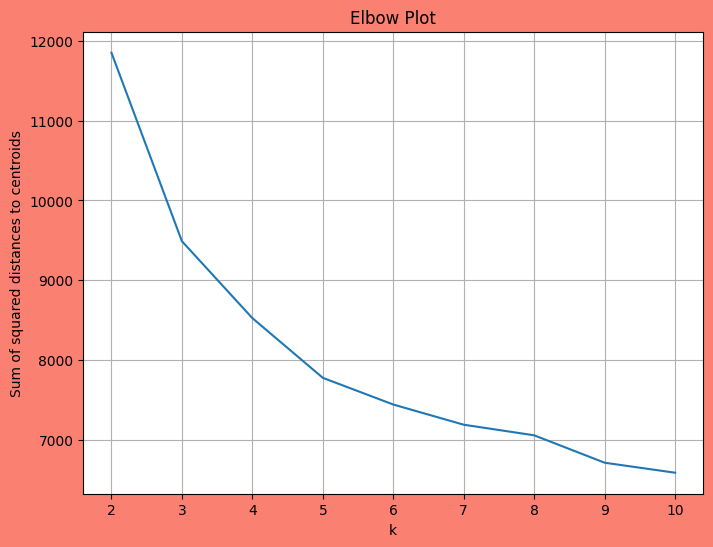

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

def elbow_plot(X, n):
  '''
  Imprimo el Elbox plot para un dataset X dado y K={2, ..., n}
  '''
  # genero las particiones para diferentes valores de k, desde 1 a n
  kMeansVar = [KMeans(n_clusters=k).fit(escaled) for k in range(2, n+1)]
  # extraigo la suma de distancias entre cada muestra y los centroides
  sum_of_squared_distances = [km.inertia_ for km in kMeansVar]
  return sum_of_squared_distances

# recupero la suma de distancias cuadradas para valores de k de 2 a 10
N = 10
sum_of_squared_distances = elbow_plot(escaled, N)

fig, ax = plt.subplots(figsize=(8,6),facecolor='salmon')
ax.plot(sum_of_squared_distances)
ax.grid(True)
ax.set_title('Elbow Plot')
ax.set_xlabel('k')
ax.set_xticklabels(np.arange(1,N+1))
ax.set_ylabel('Sum of squared distances to centroids')
plt.show()

--------- K = 2 ---------
Davies-Bouldin Score: 1.8308950514226274
Dunn Index: 0.05645708294535164
Avg Silhouette Index 0.19071021794230053
--------- K = 3 ---------
Davies-Bouldin Score: 1.478135861150923
Dunn Index: 0.05063386064457133
Avg Silhouette Index 0.21110637806297683
--------- K = 4 ---------
Davies-Bouldin Score: 1.5801875431778707
Dunn Index: 0.06916371470935458
Avg Silhouette Index 0.19336336843376908
--------- K = 5 ---------
Davies-Bouldin Score: 1.619868687412648
Dunn Index: 0.06392218757806754
Avg Silhouette Index 0.17243947498858003
--------- K = 6 ---------
Davies-Bouldin Score: 1.8345703139426972
Dunn Index: 0.07314413256192229
Avg Silhouette Index 0.16866356778780286
--------- K = 7 ---------
Davies-Bouldin Score: 1.9798712270857313
Dunn Index: 0.05063386064457133
Avg Silhouette Index 0.11765922164400008
--------- K = 8 ---------
Davies-Bouldin Score: 1.8470547459535887
Dunn Index: 0.07848029162473047
Avg Silhouette Index 0.1311797046060985
--------- K = 9 -------

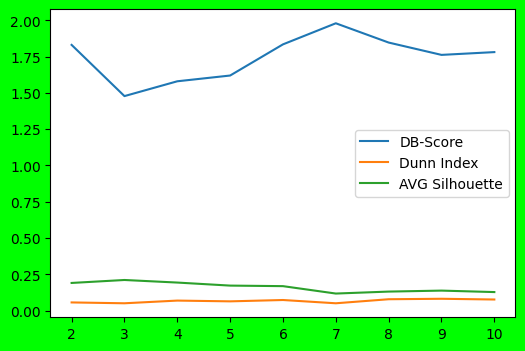

In [ ]:
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples
from validclust import dunn

def show_kmeans_metrics(X):
    K = np.arange(2,11)

    db_score = []
    dunn_index = []
    avg_silhouette = []

    for k in K:
        print("--------- K = {} ---------".format(k))
        k_means = KMeans(n_clusters=k, verbose=0, random_state=10)
        k_means.fit(escaled)
        clusters = k_means.predict(X)

        db = davies_bouldin_score(escaled, clusters)
        db_score.append(db)
        print('Davies-Bouldin Score: {}'.format(db))

        di = dunn(pairwise_distances(escaled), clusters)
        dunn_index.append(di)
        print('Dunn Index: {}'.format(di))

        avg_sil = np.mean(silhouette_samples(escaled, clusters, metric='euclidean'))
        avg_silhouette.append(avg_sil)
        print('Avg Silhouette Index {}'.format(avg_sil))
    print('')
    plt.figure(figsize=(6,4),facecolor='lime')
    plt.plot(K, db_score, label="DB-Score")
    plt.plot(K, dunn_index, label="Dunn Index")
    plt.plot(K, avg_silhouette, label='AVG Silhouette')
    plt.legend()
    plt.show()

show_kmeans_metrics(escaled)

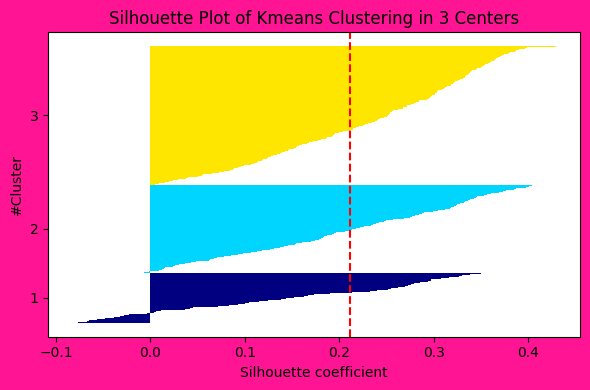

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=10)

clusters_pred = km.fit_predict(escaled)

cluster_labels = np.unique(clusters_pred)
n_clusters = cluster_labels.shape[0]

#calculo
silhouette_vals = silhouette_samples(escaled, clusters_pred, metric='euclidean')

#grafico
y_ax_lower, y_ax_upper = 0, 0
yticks = []


plt.figure(figsize=(6,4),facecolor='deeppink')
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Silhouette Plot of Kmeans Clustering in 3 Centers')
plt.ylabel('#Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(escaled, clusters_pred, metric='euclidean'))

Silhouette Coefficient: 0.211


In [ ]:
escaled['cluster'] = clusters_pred
escaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_le,University_le,cluster
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,0.612553,-1.729823,2
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,0.612553,-1.725365,2
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,0.612553,-1.720906,2
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,0.612553,-1.716448,1
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,0.612553,-1.711990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301,-1.632512,1.711990,2
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555,0.612553,1.716448,2
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029,0.612553,1.720906,2
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595,0.612553,1.725365,1


In [ ]:
escaled['cluster'].unique()

array([2, 1, 0], dtype=int32)

In [ ]:
data['cluster'] = escaled['cluster'].replace({0: 'cluster 1', 1:'cluster 2', 2:'cluster 3'})
data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_le,University_le,cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0,cluster 3
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,1,cluster 3
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,2,cluster 3
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,3,cluster 2
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,4,cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,772,cluster 3
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,773,cluster 3
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,774,cluster 3
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,775,cluster 2


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

data_np = data.to_numpy()

fig = go.Figure()

fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 1', 8], name='Cluster 1', marker_color = 'red'))
fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 2', 8], name='Cluster 2', marker_color = 'green'))
fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 3', 8], name='Cluster 3', marker_color = 'Blue'))



fig.update_layout(
    title= {'text':"BOXPLOT",
            'y':0.9, 'x':0.5,
            'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="#CLUSTER",
    yaxis_title="Room")

fig.show()

In [ ]:
data_np = data.to_numpy()

fig = go.Figure()

fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 1', 10], name='Cluster 1', marker_color = 'red'))
fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 2', 10], name='Cluster 2', marker_color = 'green'))
fig.add_trace(go.Box(y=data_np[data_np[:,19] == 'cluster 3', 10], name='Cluster 3', marker_color = 'Blue'))



fig.update_layout(
    title= {'text':"BOXPLOT",
            'y':0.9, 'x':0.5,
            'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="#CLUSTER",
    yaxis_title="Gastos Personales")

fig.show()

In [ ]:
data.groupby('cluster')[['PhD','Grad.Rate','Room.Board' ]].mean()

,PhD,Grad.Rate,Room.Board
cluster,,,
cluster 1,82.092199,57.460993,3961.234043
cluster 2,84.975709,78.360324,5183.473684
cluster 3,61.421594,60.174807,3976.724936
